## Linear Regression

Esse sao os coefientes:
('x**0', 1.005849683916084)
('x**1', 2.8329448317589624e-07)
('x**2', -2.1165128205118601e-05)
('x**3', 4.4313908313744232e-08)
('Erro da minha aproximacao:', 7.0110538110954766e-05)


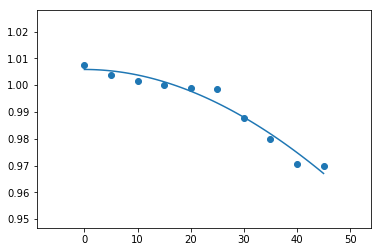

In [16]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

def LUdecomp(A):
    LU=np.copy(A)
    n =len(A)
    sign = 1.0
    p = range(n)
    for j in range(n-1):
        maxi = j
        c = abs(LU[j][j])
        for i in range(j+1,n):
            c1 = abs(LU[i][j])
            if (c1 > c):
                c = c1
                maxi = i
        if (j != maxi):
            sign *= -1.0
            itmp = p[j]
            p[j] = p[maxi]
            p[maxi] = itmp
            for k in range(n):
                dtmp = LU[maxi][k]
                LU[maxi][k] = LU[j][k]
                LU[j][k] = dtmp
        for i in range(j+1,n):
            LU[i][j] = LU[i][j]/LU[j][j]
            for k in range(j+1,n):
                LU[i][k] = LU[i][k] - LU[i][j]*LU[j][k]
    return LU,p,sign

def LUforwardsub (L,p,b):
    n = len(L)
    y = np.zeros(n)
    y[0] = b[p[0]]
    for i in range(1,n):
        y[i] = b[p[i]]
        for j in range(i):
            y[i] = y[i] - L[i][j]*y[j]
    return y
            
def LUbackwardsub (U,y):
    n = len(U)
    x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1][n-1]
    for i in range(n-2,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] = x[i] - U[i][j]*x[j]
        x[i] /= U[i][i]
    return x
    
def LUsolve(LU,p,b):
    y = LUforwardsub(LU,p,b)
    x = LUbackwardsub(LU,y)
    return x

def LUdet(LU,sign):
    n = len(LU)
    det = sign
    for i in range(n):
        det = det * LU[i][i]
    return det

def LUinverse(LU,p):
    n = len(LU)
    e = np.zeros(n)
    I = np.zeros((n,n))
    for j in range(n):
        e[j] = 1.0
        x = LUsolve(LU,p,e)
        for i in range(n):
            I[i][j] = x[i]
        e[j] = 0.0
    return I

def LUgetL(LU):
    L=np.copy(LU)
    n =len(LU)
    for i in range(n):
        L[i][i] = 1.0
        for j in range(i+1,n):
            L[i][j] = 0.0
    return L
    
def LUgetU(LU):
    U=np.copy(LU)
    n =len(LU)
    for i in range(1,n):
        for j in range(i):
            U[i][j] = 0.0
    return U
    
def LUgetP(p):
    n =len(p)
    P=np.zeros((n,n))
    for i in range(n):
        P[i][p[i]] = 1.0
    return P

def evalp(x,c):
    d = len(c)-1
    p = c[0]
    xp = 1.0
    for i in range(d):
        xp *= x
        p += c[i+1]*xp
    return p

def buildLSmatrix(x,d):
    A = np.zeros((len(x),d+1))
    for i in range(len(x)):
        for j in range(d+1):
            A[i,j] = x[i]**j
    return A

def MinimosQuadrados(x,y,d):
    A = buildLSmatrix(x,d)
    AtA = np.transpose(A).dot(A)
    Aty = np.transpose(A).dot(y)
    LU,p,sign = LUdecomp(AtA)

    L = LUgetL(LU)
    U = LUgetU(LU)
    P = LUgetP(p)
    c = LUsolve(LU,p,Aty)
    return c

def desenhaAproximacaoPolinomio(x,y,c,N,xmin,xmax):
    delta = (xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta
        px[i] = xp
        py[i] = evalp(xp,c)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-0.2*deltax, xmax+0.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [0., 5., 10., 15., 20., 25., 30., 35., 40., 45.]
y = [1.00762, 1.00392, 1.00153, 1.0, 0.99907, 0.99852, 0.98765, 0.980, 0.970666, 0.970]
n = 3
A = buildLSmatrix(x,n)
c = MinimosQuadrados(x,y,n)
print('Esse sao os coefientes:')
#print ('(c, f(X))')
for i in range(len(c)):
    print ('x**'+str(i), c[i])

erro = np.linalg.norm(A.dot(c)-y)**2
print('Erro da minha aproximacao:', erro)



desenhaAproximacaoPolinomio(x,y,c,100,min(x),max(x))

